In [1]:
# Import libraries
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Modifying Images

In this discussion, we will discuss how we can create new images by modifying different parts of exisiting images


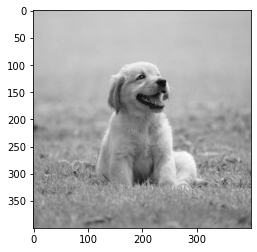

In [2]:
# Read and display image
img = cv2.imread("Images/dog.jpg")
imgRGB = img[:,:,::-1]
plt.imshow(imgRGB[:,:,1], cmap = "gray")

## Create a cropped image

Let's say, we want to crop the head of the dog!

From the figure above, can you guess the rows and columns in the image where the head is located

    probably between row #75 - #200 and column #150 - #275 ?

In [3]:
# Let's crop out a rectangle
# x coordinates = 75 to 200
# y coordinates = 150 to 275
crop = img[75:200,125:250]
print(crop.shape)

(125, 125, 3)


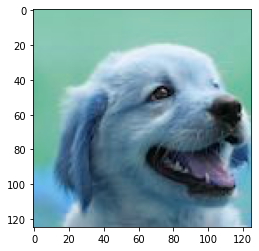

In [4]:
# display the cropped image
plt.imshow(crop)

## Image Manipulation

Let's paste this dog picture in another picture!!



[[160 162 164 166 167 169 169 169 171 170]
 [159 159 161 163 164 166 167 168 169 169]
 [157 157 159 161 163 164 165 165 167 167]
 [157 158 158 159 160 162 163 164 165 166]
 [157 157 158 157 159 161 162 163 163 164]
 [156 155 155 155 156 158 159 162 160 162]
 [153 153 152 151 153 154 156 158 159 161]
 [152 151 150 149 150 152 154 155 159 160]
 [138 139 140 140 141 142 144 147 152 156]
 [132 133 135 135 135 137 141 144 148 152]]


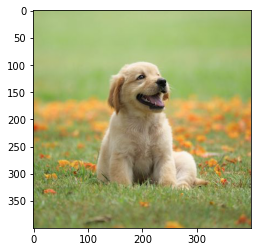

In [5]:
# copy the original image
new_img = img.copy()
print(new_img[200:210, 0:10, 1])
new_imgRGB = cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB)
plt.imshow(new_imgRGB)

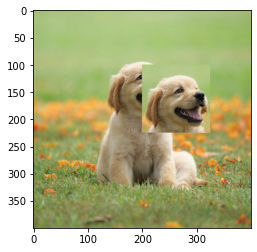

In [6]:
copyRoi = img[75:200,130:255][:,:,::-1]

# Find height and width of the ROI
roiHeight,roiWidth = copyRoi.shape[:2]

# Copy to left of Face
new_imgRGB[100:100+roiHeight, 200:200+roiWidth] = copyRoi

# Display the output
plt.figure(figsize=[4,4])
plt.imshow(new_imgRGB)

## DataType Conversion

An image is represented as a numpy array once it's read using cv2.imread function. The default datatype of this object is unsigned integer (8 bits).

For most arithmatic operations(multiply, division), we need to convert the array type to floating point with each pixel having 16, 31, 64 buts of data. This helps prevent overflow while working with images.


In [7]:
# Let's convert the values we have in our "dog.jpg" image

scalingFactor = 1/255.0

# Convert unsigned int to float
scaled_img = np.float32(img)
# Scale the values so that they lie between [0,1]
scaled_img = scaled_img * scalingFactor
print(scaled_img.max())

1.0


##  Contrast Enchancement

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[133 133 133 131 132 132 132 130 130 130]
 [133 133 133 131 131 131 131 129 129 129]
 [133 133 133 131 131 131 131 129 129 129]
 [133 133 133 131 130 130 130 128 128 128]
 [131 131 131 129 130 129 129 127 127 127]
 [131 131 131 129 129 129 129 127 127 127]
 [130 130 130 128 129 129 129 126 126 126]
 [130 130 130 128 128 128 128 126 125 125]
 [129 129 129 127 128 128 127 125 124 123]
 [129 129 129 127 127 127 126 124 123 122]]


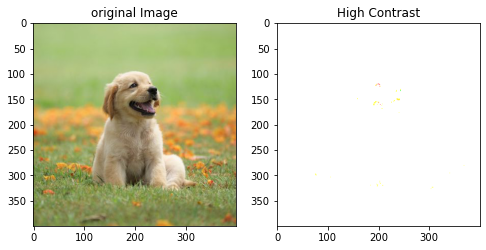

In [8]:
contrastPercentage = 20

# Multiply with scaling factor to increase contrast
contrastHigh = img * (1+contrastPercentage/100)


# Display the outputs
plt.figure(figsize=[8,4])
plt.subplot(1,2,1);
plt.imshow(img[...,::-1]);
plt.title("original Image");

plt.subplot(1,2,2);
plt.imshow(contrastHigh[...,::-1]);
plt.title("High Contrast");
print(img[100:110, 100:110, 0])

In [9]:
print("Original Image Datatype : ", img.dtype)
print("Contrast Image Datatype : ", contrastHigh.dtype)

print("Original Image Highest Pixel Intensity : ", img.max())
print("Contrast Image Highest Pixel Intensity : ", contrastHigh.max())

Original Image Datatype :  uint8
Contrast Image Datatype :  float64
Original Image Highest Pixel Intensity :  255
Contrast Image Highest Pixel Intensity :  306.0


## Issues with Contrast Enhancement

The white display in case of contrastHigh is more of a display issue. Display functions expect the images to be in either of these 2 formats:

If the image is in float datatype, then the range should be [0,1]. Anything above 1 is considered as white.
If the image is in int datatype, then the range should be [0,255]. Anything above 255 is considered as white.


## Solution
We can see that the datatype of contrastHigh is float and the max value is 280.5. 

This means that to solve this issue, we need to keep our float values between 0 - 1 or normlaize the values if we use uint8 data type

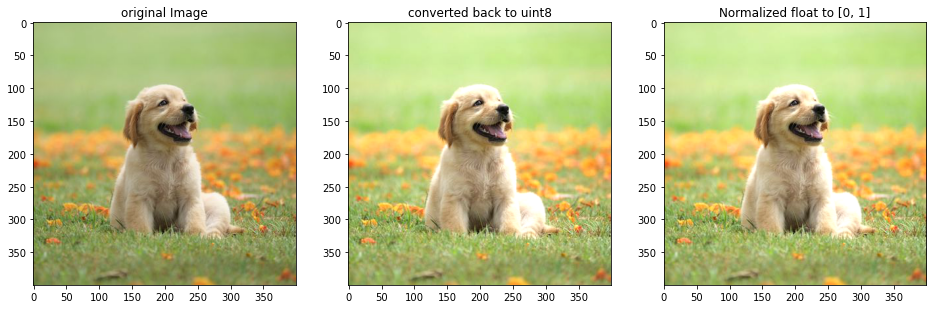

In [10]:
contrastPercentage = 20

# Clip the values to [0,255] if the values are uint8 format
contrastImage = img * (1+contrastPercentage/100)
clippedContrastImage = np.clip(contrastImage, 0, 255)
contrastHighClippedUint8 = np.uint8(clippedContrastImage)

# Convert the range to [0,1] if the values are float
contrastHighNormalized = (img * (1+contrastPercentage/100))/255
contrastHighNormalized01Clipped = np.clip(contrastHighNormalized,0,1)

plt.figure(figsize=[16,16])

plt.subplot(1,3,1);
plt.imshow(img[...,::-1]);
plt.title("original Image");

plt.subplot(1,3,2);
plt.imshow(contrastHighClippedUint8[...,::-1]);
plt.title("converted back to uint8");

plt.subplot(1,3,3);
plt.imshow(contrastHighNormalized01Clipped[...,::-1]);
plt.title("Normalized float to [0, 1]");

## Resize an Image

We will use cv2.resize function for resizing an image.

Official Documentation: https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html

Output of different resize interpolation methods: https://chadrick-kwag.net/cv2-resize-interpolation-methods/

There are two ways of using the resize function.

1. Specify width and height of output image explicitly. Use the dsize argument to specify the output size in the form (width,height).

2. Specify the scaling factors for resizing (for both width and height). Use fx and fy arguments to specify the scaling factor for horizontal and vertical axis respectively.

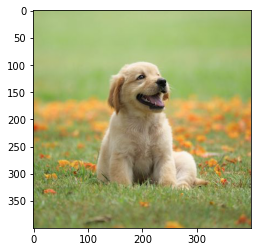

In [11]:
image = cv2.imread("Images/dog.jpg") #BGR format
plt.imshow(image[:,:,::-1]) # [:,:,::-1] - converts BGR to RGB format

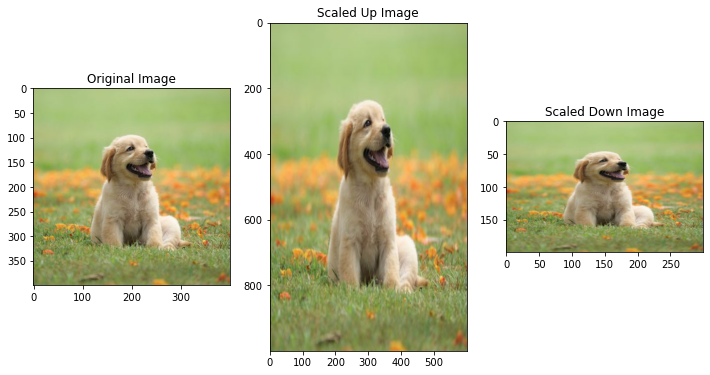

In [19]:
### resizeDownWidth ----> column, resizeDownHeight ----> row

# Set rows and columns
resizeUpWidth = 600
resizeUpHeight = 1000
resizedUp = cv2.resize(image, (resizeUpWidth, resizeUpHeight), interpolation= cv2.INTER_LINEAR)

# You can play with the aspect ratio
resizeDownWidth = 300
resizeDownHeight = 200
resizedDown = cv2.resize(image, (resizeDownWidth, resizeDownHeight), interpolation= cv2.INTER_LINEAR)

plt.figure(figsize=[12,12])
plt.subplot(1,3,1);
plt.imshow(image[:,:,::-1]);
plt.title("Original Image");

plt.subplot(1,3,2);
plt.imshow(resizedUp[:,:,::-1]);
plt.title("Scaled Up Image");

plt.subplot(1,3,3);
plt.imshow(resizedDown[:,:,::-1]);
plt.title("Scaled Down Image");

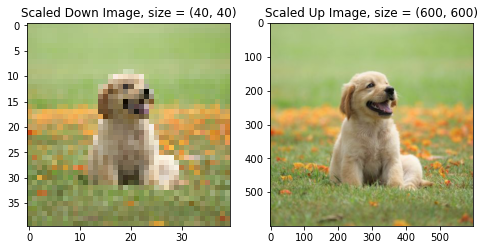

In [13]:
# Scaling Down the image 1.5 times by specifying both scaling factors
scaleUpX = 1.5
scaleUpY = 1.5

# Scaling Down the image 0.6 times specifying a single scale factor.
scaleDown = 1/10

scaledDown = cv2.resize(image, None, fx= scaleDown, fy= scaleDown, interpolation= cv2.INTER_LINEAR)

scaledUp = cv2.resize(image, None, fx= scaleUpX, fy= scaleUpY, interpolation= cv2.INTER_LINEAR)

# We can also use the following syntax for displaying image
plt.figure(figsize=[8,8])
plt.subplot(1,2,1);
plt.imshow(scaledDown[...,::-1]);
plt.title("Scaled Down Image, size = {}".format(scaledDown.shape[:2]));

plt.subplot(1,2,2);
plt.imshow(scaledUp[...,::-1]);
plt.title("Scaled Up Image, size = {}".format(scaledUp.shape[:2]));

## Image Rotation

You can rotate an image by a certain angle \theta by defining a transformation matrix M. This matrix is usually of the form:
 \begin{equation*} M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix} \end{equation*}
 
The following is the syntax for creating the 2D rotation matrix:

    getRotationMatrix2D(center, angle, scale)
    
The getRotationMatrix2D() function takes the following arguments:

    center: the center of rotation for the input image
    angle: the angle of rotation in degrees
    scale: an isotropic scale factor which scales the image up or down according to the value provided
    
The warpAffine() function applies an affine transformation to the image. After applying affine transformation, all the parallel lines in the original image will remain parallel in the output image as well.

The complete syntax for warpAffine() is given below:

    warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])

The following are the arguments of the function:

    src: the source mage
    M: the transformation matrix
    dsize: size of the output image
    dst: the output image
    flags: combination of interpolation methods such as INTER_LINEAR or INTER_NEAREST
    borderMode: the pixel extrapolation method
    borderValue: the value to be used in case of a constant border, has a default value of 0

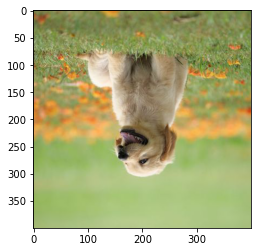

In [14]:
# dividing height and width by 2 to get the center of the image
height, width = image.shape[:2]

# get the center coordinates of the image to create the 2D rotation matrix
center = (width/2, height/2)
 
# using cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=180, scale=1)
 
# rotate the image using cv2.warpAffine
rotated_image = cv2.warpAffine(src=image, M=rotate_matrix, dsize=(width, height))

 
plt.imshow(rotated_image[:,:,::-1])

## Image Translation

In computer vision, translation of an image means shifting it by a specified number of pixels, along the x and y axes. Let the pixels by which the image needs to shifted be tx and ty. Then you can define a translation matrix M:

\begin{equation*} M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix} \end{equation*}

Now, there are a few points you should keep in mind while shifting the image by tx and ty values.

    Providing positive values for tx will shift the image to right and negative values will shift the image to the left.
    Similarly, positive values of ty will shift the image down while negative values will shift the image up.

Follow these steps to translate an image, using OpenCV:

    First, read the image and obtain its width and height.
    Next, like you did for rotation, create a transformation matrix, which is a 2D array. This matrix contains the information needed to shift the image, along the x and y axes.
    Again, as in rotation, use the warpAffine() function, in this final step, to apply the affine transformation.


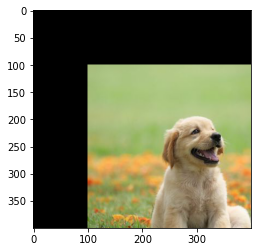

In [20]:
# dividing height and width by 2 to get the center of the image
height, width = image.shape[:2]

# get the center coordinates of the image
center = (width/2, height/2)

# get tx and ty values for translation
tx, ty = width/4, height/4
 
# create the translation matrix using tx and ty, it is a NumPy array 
translation_matrix = np.array([[1, 0, 100],
                               [0, 1, ty]], dtype=np.float32)

# apply the translation to the image
translated_image = cv2.warpAffine(src=image, M=translation_matrix, dsize=(width, height))

plt.imshow(translated_image[:,:,::-1])

## Masking an Image using Pixel Intensity values

Masking is an image processing method in which we define a small 'image piece' and use it to modify a larger image. Masking is the process that is underneath many types of image processing, including edge detection, motion detection, and noise reduction.

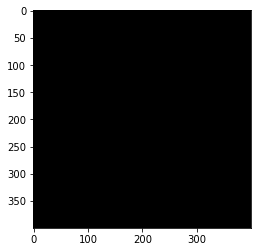

In [16]:
# Create an empty image of same size as the original
mask1 = np.zeros_like(image)
plt.imshow(mask1)

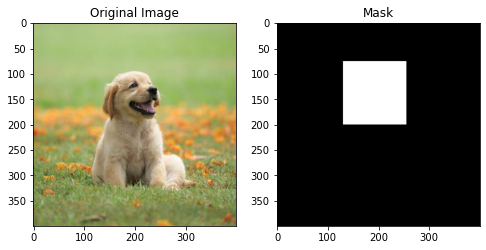

In [17]:
mask1[75:200,130:255] = 255

plt.figure(figsize=[8,8])
plt.subplot(1,2,1);
plt.imshow(img[:,:,::-1]);
plt.title("Original Image")

plt.subplot(1,2,2);
plt.imshow(mask1[:,:,::-1]);
plt.title("Mask");

Another way of creating masks is by using some logics to segment different colors. For example, if we want to focus on red pixels, the simplest logic that does the trick is:

* The red channel should have high intensity ( keep the range of pixel values from 100 to 255 )
* The other 2 channels should have low intensity ( keep the range of pixel values in Blue and Green channels between 0 to 100)

There is a nice OpenCV function(cv2.inRange) which can do exactly this. We will use the opencv function inRange

Official documentation: https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga48af0ab51e36436c5d04340e036ce981


It produces a binary image where pixels are either black or white.

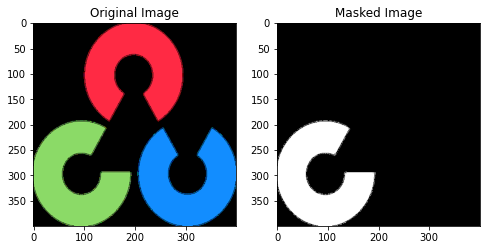

In [25]:
unmasked_image = cv2.imread("Images/opencv-01.png")

#print(unmasked_image[50:52,200:202])

mask = cv2.inRange(unmasked_image, (0,75,0), (150,255,150))

#print(mask[50:52,200:202])

plt.figure(figsize=[8,8])
plt.subplot(121);
plt.imshow(unmasked_image[:,:,::-1]);
plt.title("Original Image");

plt.subplot(122);
plt.imshow(mask, cmap = "gray");
plt.title("Masked Image");

Resources:
    
1. https://pysource.com/2018/01/24/basic-operations-on-images-opencv-3-4-with-python-3-tutorial-4/
2. https://learnopencv.com/getting-started-with-opencv/
